In [3]:
#Importing Data Manipulation Libraries
import numpy as np
import pandas as pd

#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Warnings
import warnings 
warnings.filterwarnings('ignore')

#Importing Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split;

#Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix

#Importing Logging
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)

In [14]:
# Import Dataset using pandas Function
customer_data =  pd.read_csv('customer_data.csv')
payment_data =  pd.read_csv('payment_data.csv')

In [10]:
# Checking Information about Dataset
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


In [11]:
# Checking Information about Dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [12]:
# Merging Two Dataset  : Data
data = payment_data.merge(customer_data,how = 'left')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
 12  label            8250 non-null   int64  
 13  fea_1            8250 non-null   int64  
 14  fea_2            7222 non-null   float64
 15  fea_3            8250 non-null   int64  
 16  fea_4            8250 non-null   float64
 17  fea_5         

In [16]:
df = (data)
df.sample(frac = 1)

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,...,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
6347,58985693,0,0,0,0,36,10,NaN,06/10/2008,0.0,...,NaN,3,227000.0,2,15,-1,110,4,450080,183.030052
3919,54985378,0,0,0,0,16,10,73700.0,27/08/2013,24.0,...,1203.5,3,76000.0,2,11,5,78,5,60005,173.205081
6209,58999868,1,4,0,263,20,13,NaN,03/01/2009,0.0,...,1275.5,3,136000.0,2,8,5,113,4,60000,1.000000
868,58986183,0,0,0,0,3,5,NaN,11/09/2015,189765.6,...,NaN,2,72000.0,2,15,5,114,5,350050,168.697955
6968,58987276,0,0,0,0,30,10,110000.0,12/09/2007,0.0,...,NaN,3,50000.0,2,15,9,110,5,450080,194.935887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,54991626,0,0,0,0,10,6,NaN,01/12/2013,0.0,...,NaN,2,92000.0,2,8,-1,107,4,350052,158.113883
831,58994284,0,0,0,0,7,10,38500.0,15/09/2015,41998.8,...,1214.0,3,81000.0,2,11,9,114,4,450012,204.939015
7925,58999688,0,0,0,0,0,10,NaN,17/11/2004,-132.0,...,NaN,2,130000.0,2,8,5,73,5,60024,207.860530
1691,58987963,0,0,0,0,7,6,NaN,10/04/2015,15190.8,...,1236.5,1,52000.0,2,15,5,112,4,550009,172.615179


<Axes: >

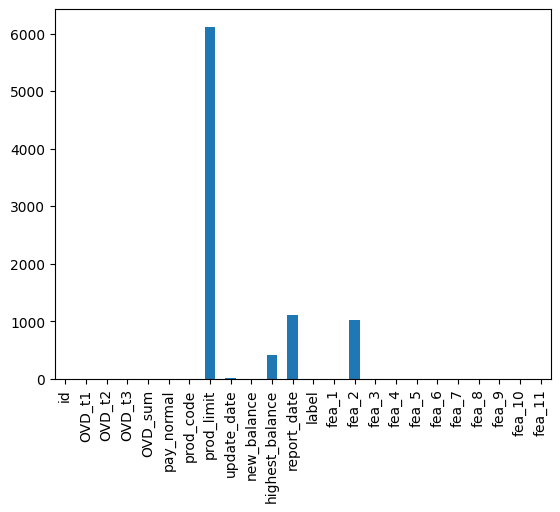

In [17]:
df.isna().sum().plot(kind='bar')